<a href="https://colab.research.google.com/github/yuki-tamaribuchi/ml_code_kata/blob/master/kaggle_house_prices_data_processing_v5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Load

In [1]:
!pip install category_encoders

     |████████████████████████████████| 81kB 5.8MB/s 


In [2]:
!mkdir /root/.kaggle
!cp /content/drive/MyDrive/kaggle/kaggle.json /root/.kaggle

In [3]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

  0% 0.00/31.2k [00:00<?, ?B/s]
100% 31.2k/31.2k [00:00<00:00, 52.8MB/s]
  0% 0.00/13.1k [00:00<?, ?B/s]
100% 13.1k/13.1k [00:00<00:00, 13.4MB/s]
  0% 0.00/450k [00:00<?, ?B/s]
100% 450k/450k [00:00<00:00, 55.4MB/s]
  0% 0.00/441k [00:00<?, ?B/s]
100% 441k/441k [00:00<00:00, 62.6MB/s]


In [4]:
!cat data_description.txt

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [21]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.max_columns=None
np.set_printoptions(threshold=np.inf)

In [6]:
df=pd.read_csv('train.csv')

In [7]:
train_df=df

train_df=train_df.drop(['Id'],axis=1)

train_df['MiscFeature']=train_df['MiscFeature'].fillna('none')
train_df['FireplaceQu']=train_df['FireplaceQu'].fillna('none')
train_df['Fence']=train_df['Fence'].fillna('none')
train_df['PoolQC']=train_df['PoolQC'].fillna('none')
train_df['Alley']=train_df['Alley'].fillna('none')
train_df['BsmtQual']=train_df['BsmtQual'].fillna('none')
train_df['BsmtCond']=train_df['BsmtCond'].fillna('none')
train_df['BsmtExposure']=train_df['BsmtExposure'].fillna('none')
train_df['BsmtFinType1']=train_df['BsmtFinType1'].fillna('none')
train_df['BsmtFinType2']=train_df['BsmtFinType2'].fillna('none')
train_df['GarageType']=train_df['GarageType'].fillna('none')
train_df['GarageYrBlt']=train_df['GarageYrBlt'].fillna('none')
train_df['GarageFinish']=train_df['GarageFinish'].fillna('none')
train_df['GarageQual']=train_df['GarageQual'].fillna('none')
train_df['GarageCond']=train_df['GarageCond'].fillna('none')

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(train_df.drop(['SalePrice'],axis=1),train_df['SalePrice'],random_state=0)

In [10]:
from category_encoders import TargetEncoder

num_cols=X_train._get_numeric_data().columns
cat_cols=X_train.drop(num_cols,axis=1).columns


encoders=[TargetEncoder() for _ in range(len(cat_cols))]


def fit_encode(data,target,encoder):
  nonnulls=np.array(data.dropna())
  target=target.loc[data.dropna().index]
  reshaped=nonnulls.reshape(-1,1)
  encoded=encoder.fit_transform(reshaped,target)
  data.loc[data.notnull()]=np.squeeze(encoded)
  return data

def encode_only(data,encoder):
  nonnulls=np.array(data.dropna())
  reshaped=nonnulls.reshape(-1,1)
  encoded=encoder.transform(reshaped)
  data.loc[data.notnull()]=np.squeeze(encoded)
  return data
  
for i,columns in enumerate(cat_cols):
  fit_encode(X_train[columns],y_train,encoders[i])

for i,columns in enumerate(cat_cols):
  encode_only(X_test[columns],encoders[i])


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: i

In [11]:
from fancyimpute import KNN

imputer=KNN()
X_train=pd.DataFrame(np.round(imputer.fit_transform(X_train)),columns=X_train.columns)
X_test=pd.DataFrame(np.round(imputer.fit_transform(X_test)),columns=X_test.columns)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


Imputing row 1/1095 with 44 missing, elapsed time: 0.631
Imputing row 101/1095 with 0 missing, elapsed time: 0.651
Imputing row 201/1095 with 0 missing, elapsed time: 0.676
Imputing row 301/1095 with 44 missing, elapsed time: 0.697
Imputing row 401/1095 with 0 missing, elapsed time: 0.710
Imputing row 501/1095 with 0 missing, elapsed time: 0.727
Imputing row 601/1095 with 0 missing, elapsed time: 0.748
Imputing row 701/1095 with 0 missing, elapsed time: 0.767
Imputing row 801/1095 with 0 missing, elapsed time: 0.787
Imputing row 901/1095 with 0 missing, elapsed time: 0.808
Imputing row 1001/1095 with 44 missing, elapsed time: 0.827
Imputing row 1/365 with 46 missing, elapsed time: 0.083
Imputing row 101/365 with 0 missing, elapsed time: 0.126
Imputing row 201/365 with 0 missing, elapsed time: 0.167
Imputing row 301/365 with 0 missing, elapsed time: 0.216


In [12]:
X_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,70.0,180782.0,60.0,6600.0,181761.0,181900.0,183828.0,177765.0,181809.0,181779.0,181082.0,181332.0,181941.0,181752.0,181514.0,181689.0,5.0,4.0,1892.0,1965.0,183196.0,181799.0,191892.0,180241.0,181889.0,0.0,184547.0,182009.0,183032.0,183527.0,181935.0,181883.0,178902.0,0.0,180643.0,0.0,994.0,994.0,181894.0,183080.0,183192.0,181982.0,1378.0,994.0,0.0,2372.0,0.0,0.0,2.0,0.0,4.0,2.0,180459.0,11.0,178745.0,0.0,181973.0,181455.0,179711.0,181261.0,1.0,432.0,183186.0,181817.0,184524.0,0.0,287.0,0.0,0.0,0.0,0.0,181883.0,185339.0,182441.0,0.0,12.0,2009.0,182615.0,180933.0
1,80.0,180301.0,81.0,10784.0,181761.0,182175.0,182430.0,182074.0,181809.0,175198.0,181966.0,194971.0,181941.0,181752.0,181393.0,183153.0,7.0,5.0,1991.0,1992.0,188430.0,181798.0,185456.0,186765.0,178287.0,76.0,178884.0,180612.0,180951.0,174312.0,181293.0,185015.0,177837.0,0.0,180643.0,0.0,384.0,384.0,181894.0,178021.0,181204.0,181387.0,802.0,670.0,0.0,1472.0,0.0,0.0,2.0,1.0,3.0,1.0,179806.0,7.0,181932.0,1.0,182263.0,182690.0,185672.0,183188.0,2.0,402.0,181953.0,181817.0,181158.0,164.0,0.0,0.0,0.0,0.0,0.0,181883.0,185339.0,182441.0,0.0,5.0,2007.0,198827.0,202281.0
2,80.0,196850.0,86.0,10246.0,181761.0,182175.0,182206.0,182074.0,181809.0,179224.0,181966.0,175182.0,183420.0,181752.0,187345.0,182424.0,4.0,9.0,1965.0,2001.0,179573.0,181798.0,177460.0,173547.0,179256.0,0.0,182518.0,180612.0,174582.0,185683.0,187332.0,186409.0,185261.0,648.0,186933.0,0.0,0.0,648.0,181894.0,179655.0,181204.0,181387.0,960.0,0.0,0.0,960.0,1.0,1.0,0.0,0.0,0.0,1.0,180386.0,3.0,181932.0,0.0,181525.0,180750.0,188032.0,180676.0,1.0,364.0,181953.0,181817.0,181876.0,88.0,0.0,0.0,0.0,0.0,0.0,181883.0,181862.0,182441.0,0.0,5.0,2006.0,184188.0,184283.0
3,60.0,180301.0,60.0,21930.0,181761.0,182175.0,181251.0,182074.0,181809.0,180940.0,181966.0,178231.0,187220.0,181752.0,181393.0,180279.0,5.0,5.0,2005.0,2005.0,180807.0,181798.0,190480.0,184212.0,181544.0,0.0,182012.0,184640.0,181737.0,179622.0,181293.0,181231.0,185093.0,0.0,180643.0,0.0,732.0,732.0,181894.0,181703.0,181204.0,181387.0,734.0,1104.0,0.0,1838.0,0.0,0.0,2.0,1.0,4.0,1.0,183010.0,7.0,181932.0,1.0,183592.0,180072.0,187740.0,182396.0,2.0,372.0,181129.0,181011.0,182667.0,100.0,40.0,0.0,0.0,0.0,0.0,181883.0,178648.0,182441.0,0.0,7.0,2006.0,182268.0,181922.0
4,20.0,180301.0,78.0,10140.0,181761.0,182175.0,194681.0,187740.0,181809.0,175198.0,178677.0,178125.0,181941.0,181752.0,181393.0,183153.0,6.0,6.0,1974.0,1999.0,179573.0,181798.0,185456.0,186765.0,170834.0,99.0,182518.0,188404.0,180951.0,174312.0,181293.0,179791.0,187862.0,663.0,180643.0,377.0,0.0,1040.0,181894.0,178021.0,181204.0,184705.0,1309.0,0.0,0.0,1309.0,1.0,0.0,1.0,1.0,3.0,1.0,179806.0,5.0,181932.0,1.0,181838.0,181192.0,168608.0,179810.0,2.0,484.0,181953.0,181817.0,181158.0,265.0,0.0,0.0,0.0,0.0,648.0,181883.0,156103.0,182441.0,0.0,1.0,2006.0,179588.0,178627.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

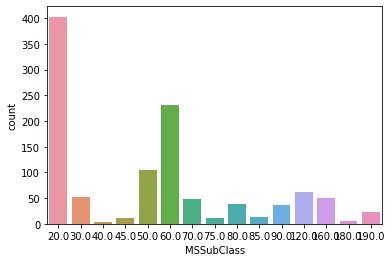

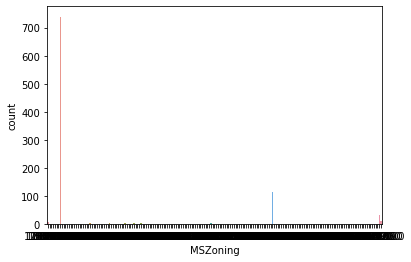

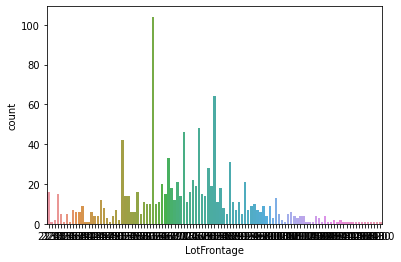

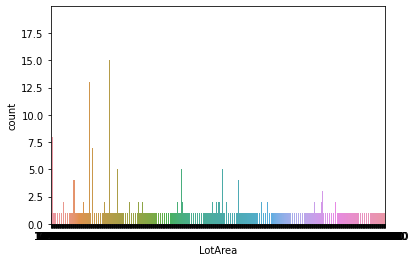

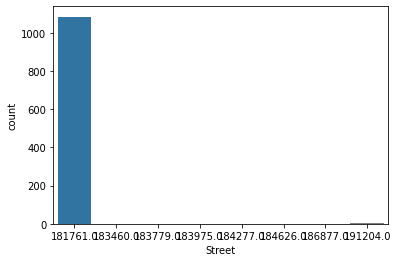

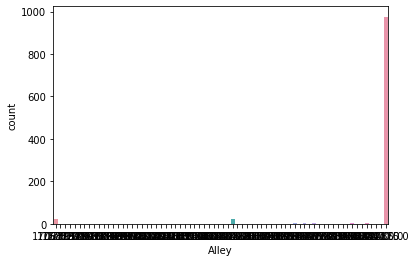

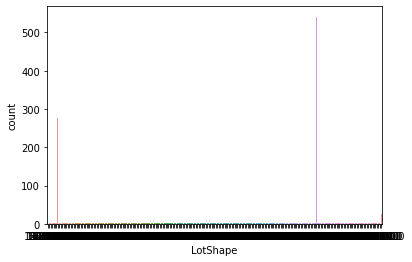

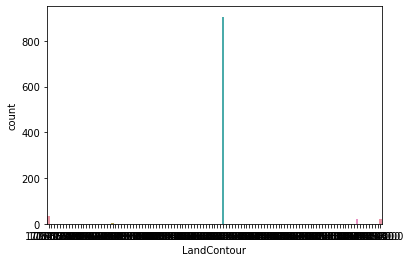

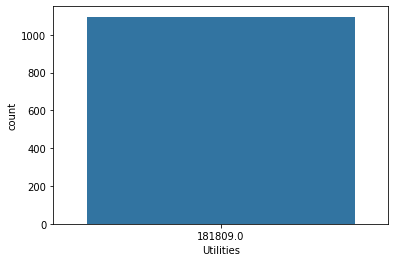

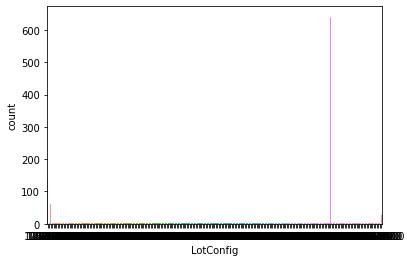

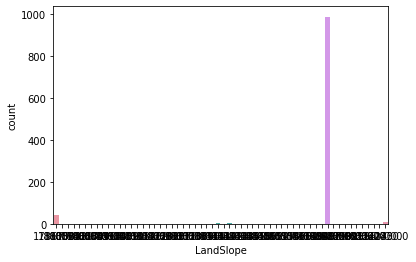

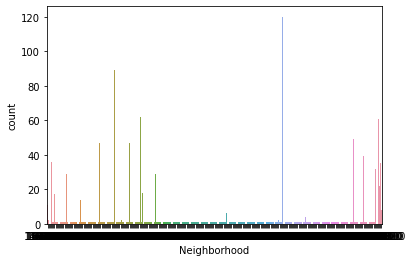

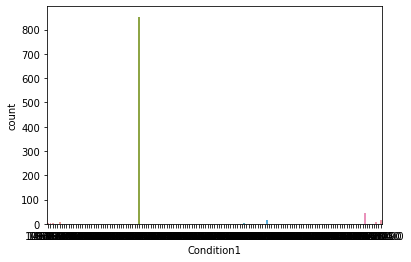

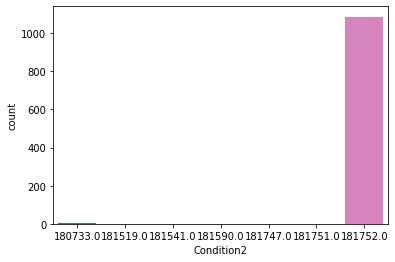

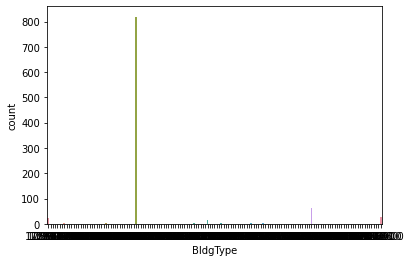

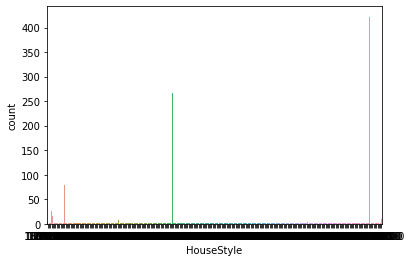

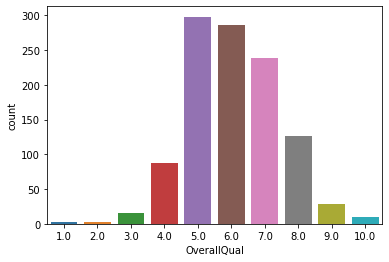

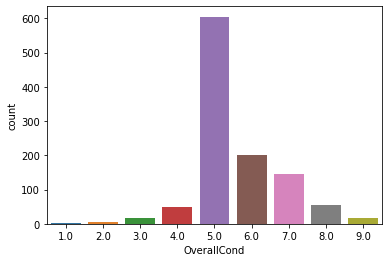

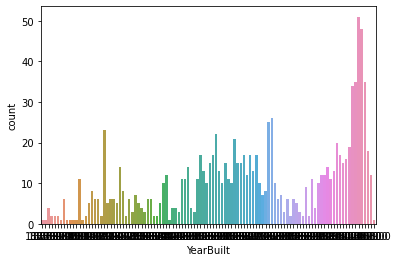

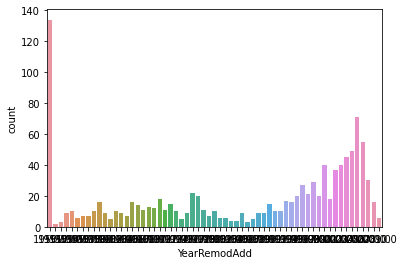

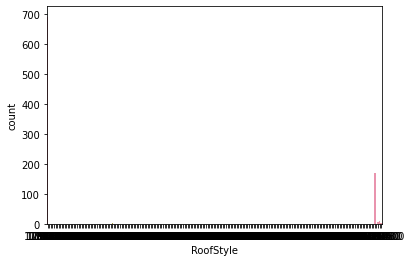

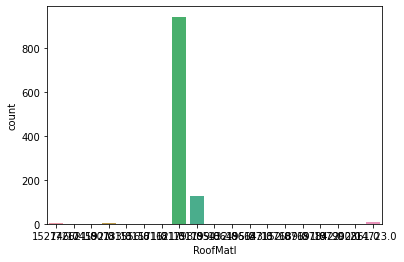

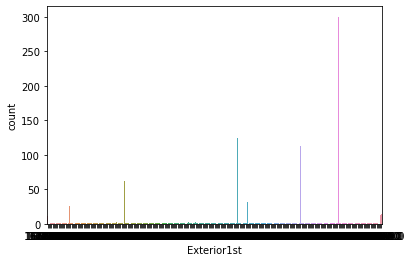

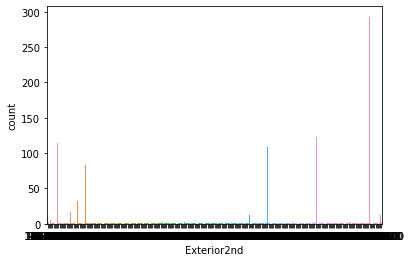

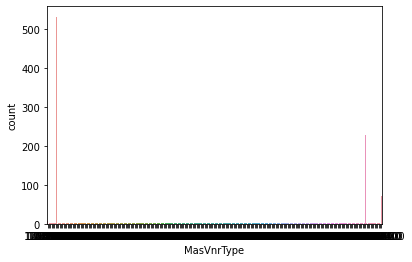

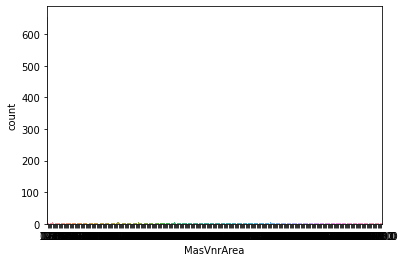

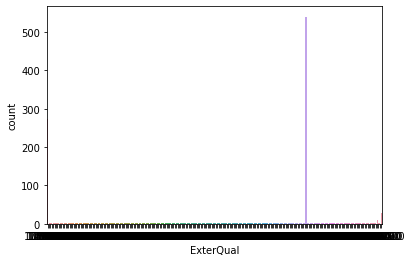

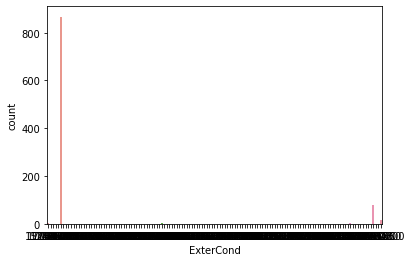

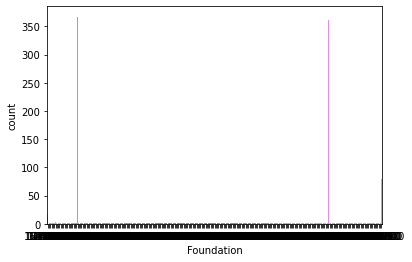

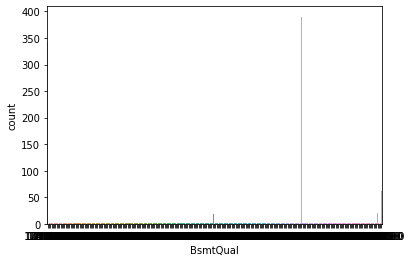

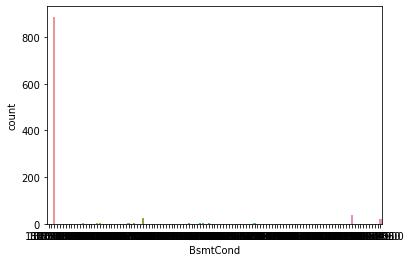

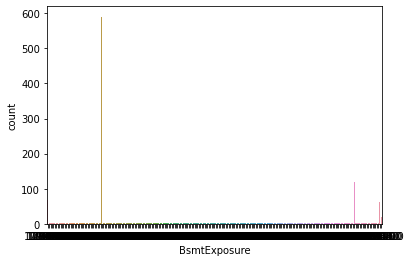

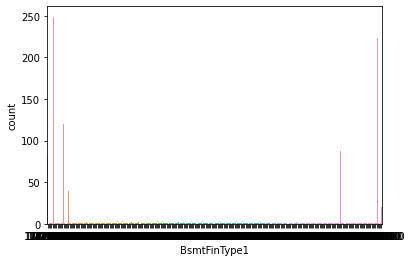

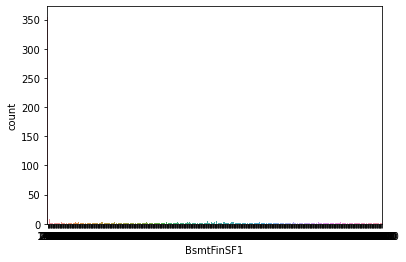

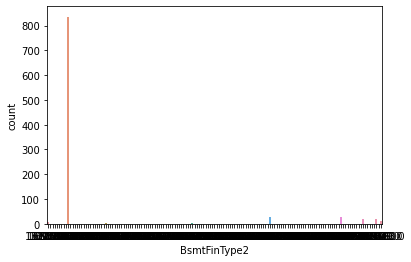

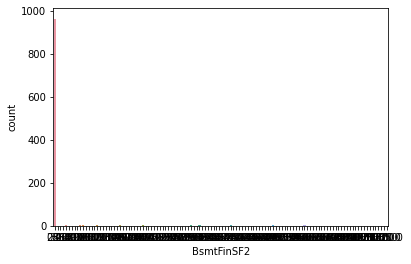

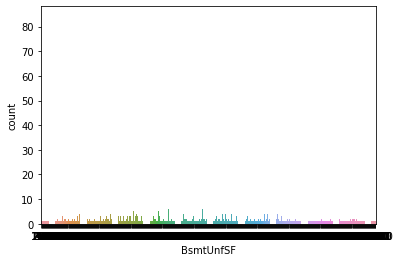

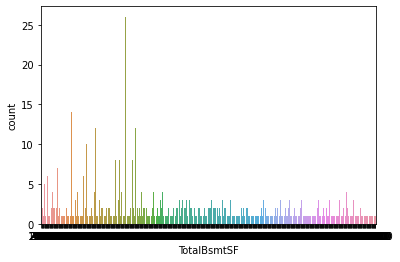

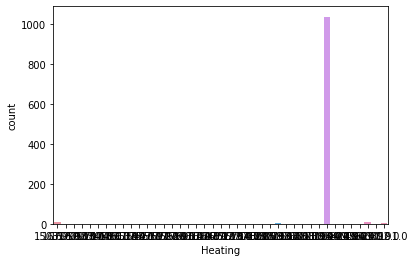

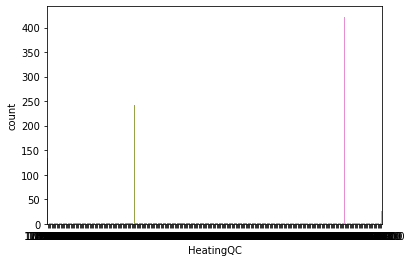

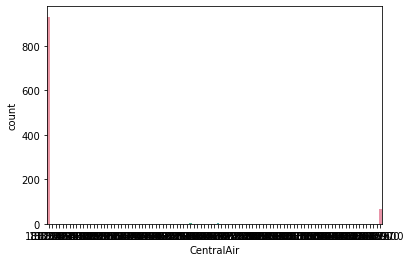

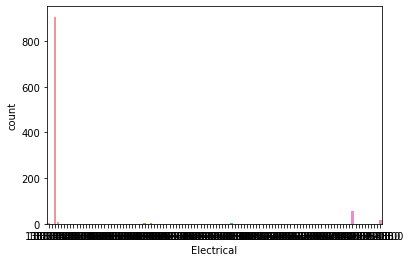

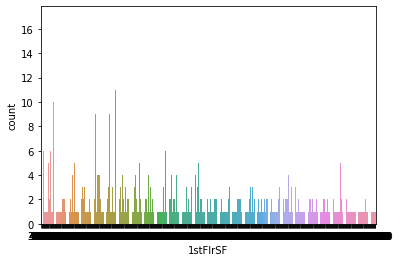

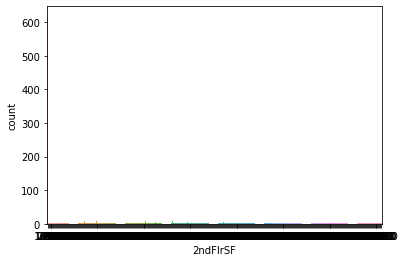

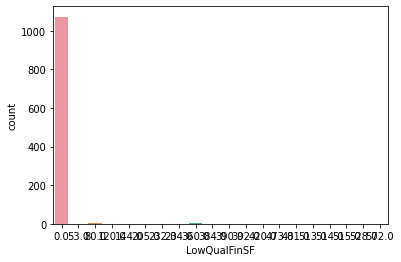

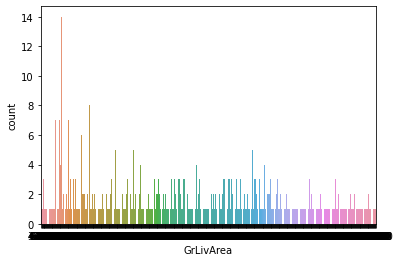

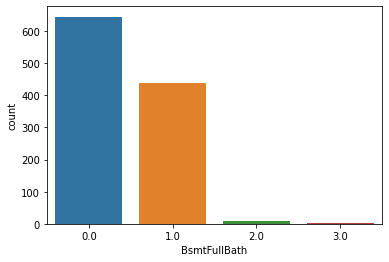

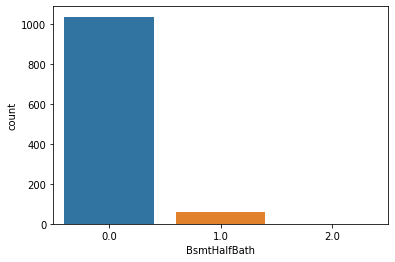

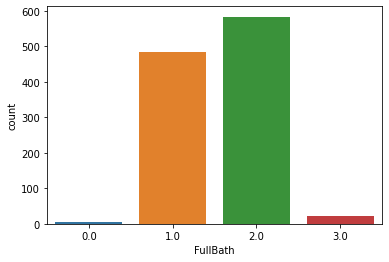

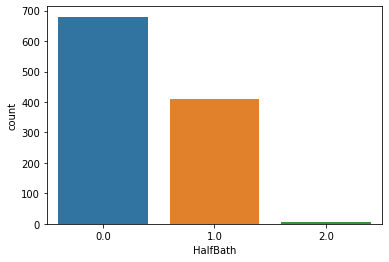

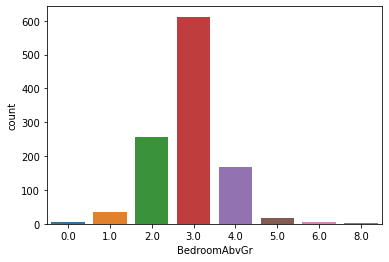

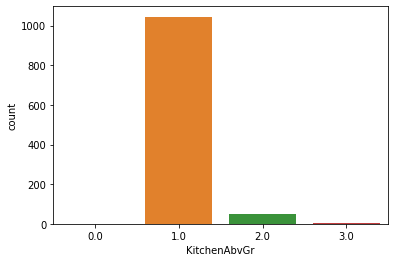

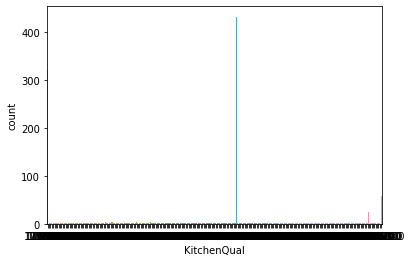

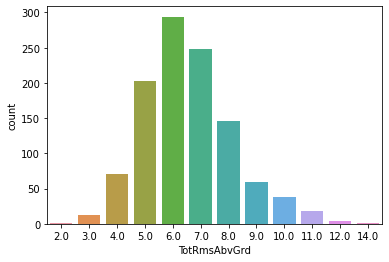

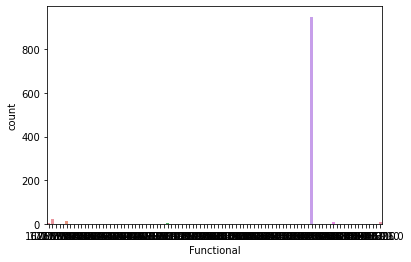

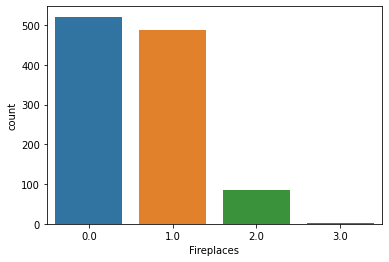

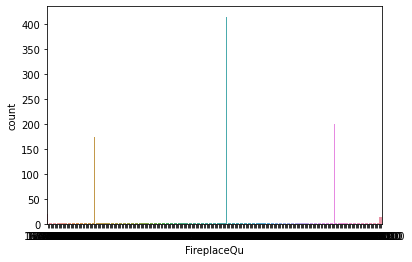

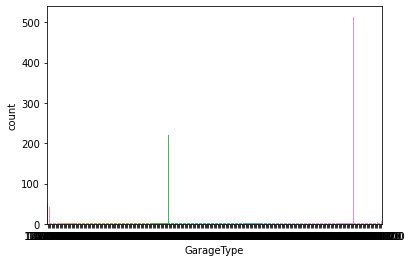

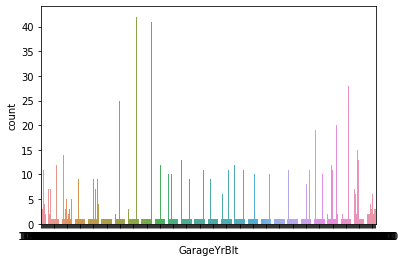

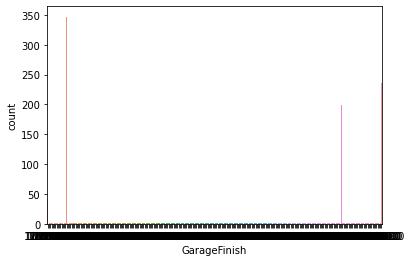

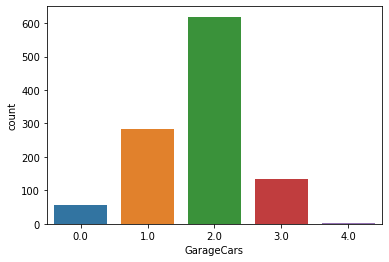

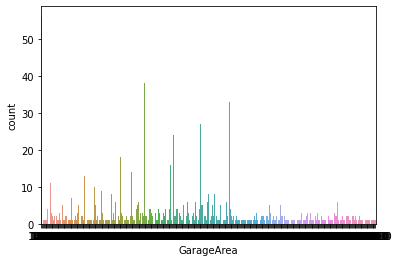

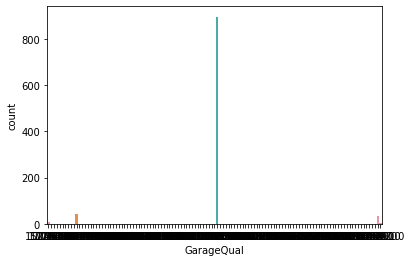

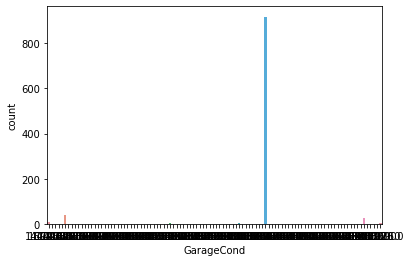

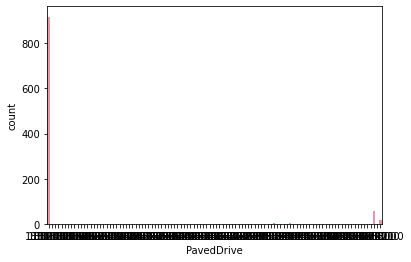

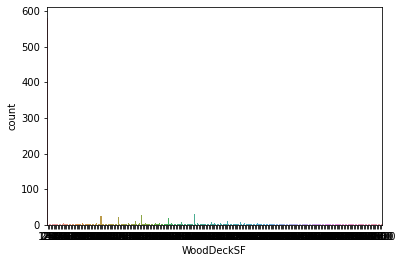

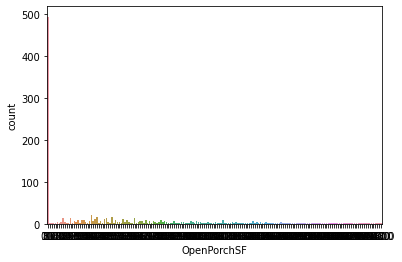

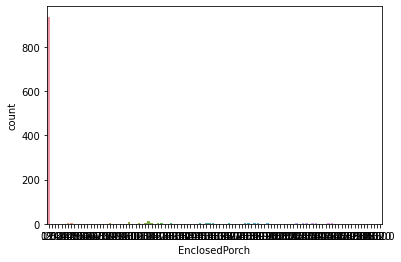

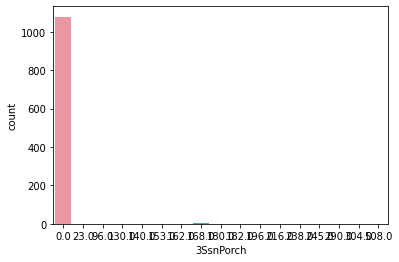

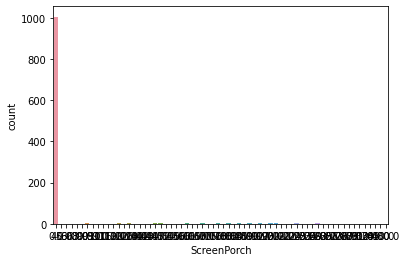

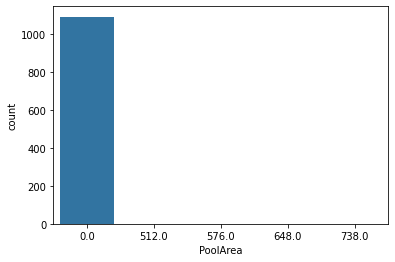

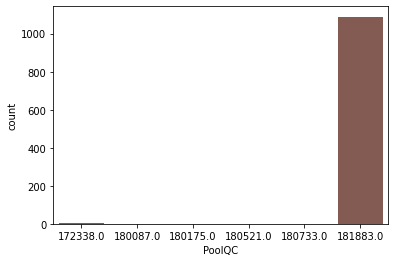

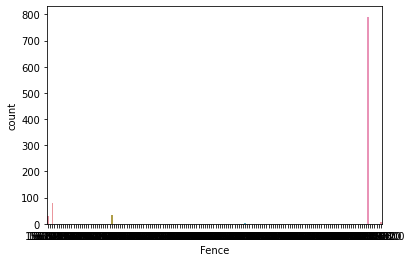

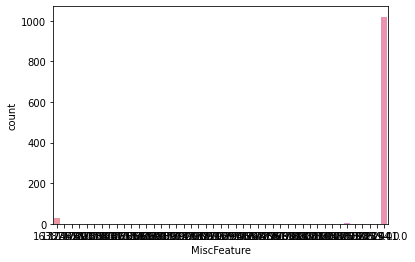

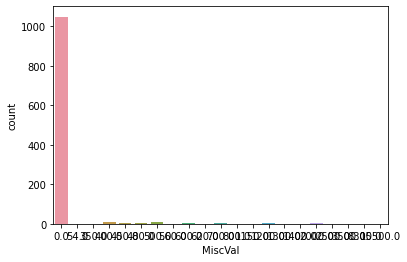

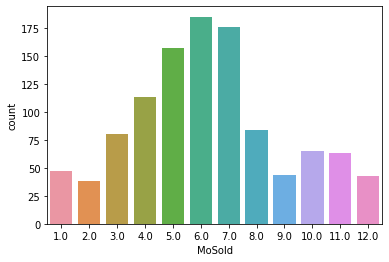

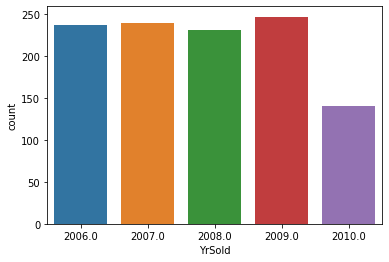

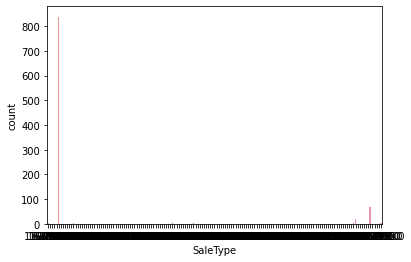

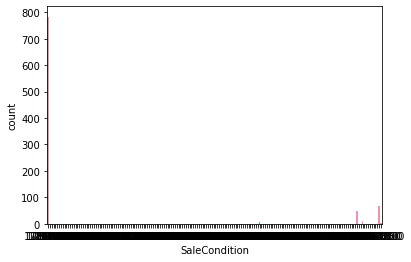

In [22]:
for col in X_train:
  plt.figure()
  sns.countplot(X_train[col])

In [16]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X_train=pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
scaled_X_test=pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)

In [17]:
scaled_X_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.317606,-0.213853,-0.472142,-0.393285,-0.081231,0.046968,0.466765,-1.907020,0.0,-0.001688,-1.133903,-0.062730,0.019406,0.061714,-0.100508,-0.016565,-0.786288,-1.406647,-2.616830,-0.957391,0.358879,-0.064732,0.991122,-0.095156,0.003999,-0.567356,0.949688,0.092293,0.496039,0.233336,0.028578,0.030298,-0.628189,-1.015267,-0.194217,-0.294126,0.976472,-0.150487,0.063050,0.470008,0.752781,0.074135,0.577236,1.455439,-0.126444,1.647481,-0.816788,-0.238777,0.789340,-0.772647,1.378714,4.308775,-0.301695,2.730158,-0.840420,-0.948713,0.058329,-0.075887,-0.093295,-0.237647,-1.042037,-0.190341,0.398730,0.010212,1.393175,-0.741261,3.531974,-0.359797,-0.111832,-0.273295,-0.059996,0.054904,0.414776,0.208696,-0.094246,2.105479,0.874407,0.090187,-0.132990
1,0.554673,-0.309383,0.462429,0.022848,-0.081231,0.205337,0.137172,0.131347,0.0,-1.630197,0.230587,1.462195,0.019406,0.061714,-0.142582,0.270670,0.681718,-0.509571,0.662223,0.355347,1.724602,-0.065063,0.357406,0.401696,-0.761645,-0.153248,-1.045995,-0.299817,-0.343466,-1.034692,-0.254521,0.856768,-0.861865,-1.015267,-0.194217,-0.294126,-0.421916,-1.635046,0.063050,-1.662092,-0.333650,-0.149513,-0.954877,0.719000,-0.126444,-0.095211,-0.816788,-0.238777,0.789340,1.236970,0.135146,-0.206161,-0.443094,0.274193,0.042815,0.615806,0.144370,0.196325,0.171719,0.625562,0.321201,-0.332953,0.047402,0.010212,-0.333086,0.548007,-0.700181,-0.359797,-0.111832,-0.273295,-0.059996,0.054904,0.414776,0.208696,-0.094246,-0.468033,-0.619315,2.297220,2.906850
2,0.554673,2.977344,0.684945,-0.030660,-0.081231,0.205337,0.084361,0.131347,0.0,-0.633939,0.230587,-0.750339,0.325934,0.061714,1.927028,0.127641,-1.520291,3.078729,-0.198942,0.792927,-0.586481,-0.065063,-0.429914,-0.604955,-0.555673,-0.567356,0.234653,-0.299817,-2.912812,0.530012,2.408455,1.224616,0.767061,0.476443,0.769372,-0.294126,-1.302212,-0.992548,0.063050,-0.973447,-0.333650,-0.149513,-0.534610,-0.803882,-0.126444,-1.086609,1.123305,4.047471,-2.873062,-0.772647,-3.595560,-0.206161,-0.317502,-2.181771,0.042815,-0.948713,-0.074590,-0.231279,0.276641,-0.499701,-1.042037,-0.513596,0.047402,0.010212,0.035142,-0.049459,-0.700181,-0.359797,-0.111832,-0.273295,-0.059996,0.054904,-0.009393,0.208696,-0.094246,-0.468033,-1.366176,0.304329,0.344032
3,0.080538,-0.309383,-0.472142,1.131410,-0.081231,0.205337,-0.140790,0.131347,0.0,-0.209304,0.230587,-0.409442,1.113495,0.061714,-0.142582,-0.293206,-0.786288,-0.509571,1.125928,0.987407,-0.264490,-0.065063,0.852090,0.207265,-0.069334,-0.567356,0.056335,0.830762,-0.026382,-0.304010,-0.254521,-0.141752,0.730199,-1.015267,-0.194217,-0.294126,0.375853,-0.788117,0.063050,-0.110324,-0.333650,-0.149513,-1.135751,1.705464,-0.126444,0.613484,-0.816788,-0.238777,0.789340,1.236970,1.378714,-0.206161,0.250693,0.274193,0.042815,0.615806,0.538677,-0.380721,0.263659,0.270782,0.321201,-0.475566,-0.187386,-0.105831,0.440808,0.044878,-0.110334,-0.359797,-0.111832,-0.273295,-0.059996,0.054904,-0.401477,0.208696,-0.094246,0.267256,-1.366176,0.042948,0.007838
4,-0.867732,-0.309383,0.328919,-0.041203,-0.081231,0.205337,3.025477,2.811642,0.0,-1.630197,-4.846116,-0.421293,0.019406,0.061714,-0.142582,0.270670,-0.05228